In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [15]:
beta = 1
min_dist = 20
omega = 0.3

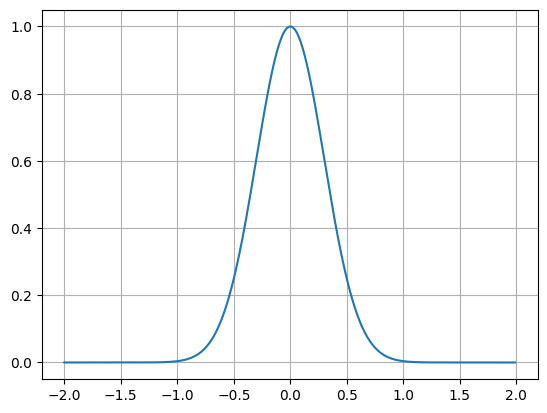

In [16]:
def reward_function_dist_to_target(x) -> float:
    return beta * np.exp(-1 * (x**2) / (2*(omega**2)))

x = np.arange(-2, 2, 0.01)
y = [reward_function_dist_to_target(elem) for elem in x]
plt.plot(x, y)
plt.grid()

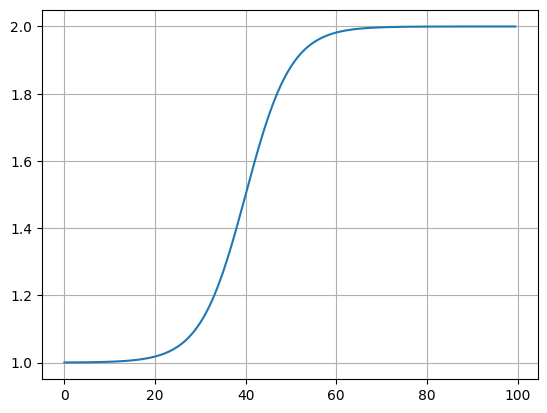

In [808]:
# Sigmoid function.
# Idea: Max reward (=1) if distance traveld below minimum distance.
# With increasing distance rapidly dropping reward.
def reward_function_dist_traveled(x):
    c = 0.2 # Stretch factor.
    min = min_dist * 2 # Minimum distance.
    return ((beta) / (1 + np.e**(-1 * c * (x - min)))) + beta

x = np.arange(0, 100, 0.5)
y = [reward_function_dist_traveled(elem) for elem in x]
plt.plot(x, y)
plt.grid()

In [809]:
def get_reward_component_distance_traveled(distance):
    return reward_function_dist_traveled(distance)

def get_reward_component_distance_to_target(distance):
    return reward_function_dist_to_target(distance)

Ideas:
* Reward for dist traveled * weight + reward remaining dist to target * weight
  * Resulted in agent optimising for long traveled distance

In [810]:
def get_reward(dist_traveled, dist_to_target):
    return get_reward_component_distance_traveled(dist_traveled) * get_reward_component_distance_to_target(dist_to_target) * 0.5

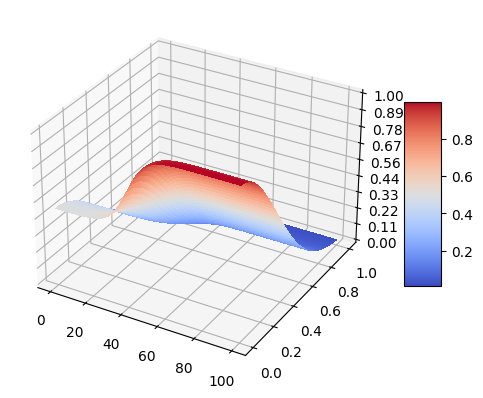

In [811]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# x_dist_to_target = np.linspace(0,1,5000)
# y_dist_traveled = np.linspace(0, 50, 5000)

# Make data.
X = np.linspace(0, 100,5000)
Y = np.linspace(0, 1, 5000)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
Z = get_reward(X, Y)


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, np.max(Z))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

180

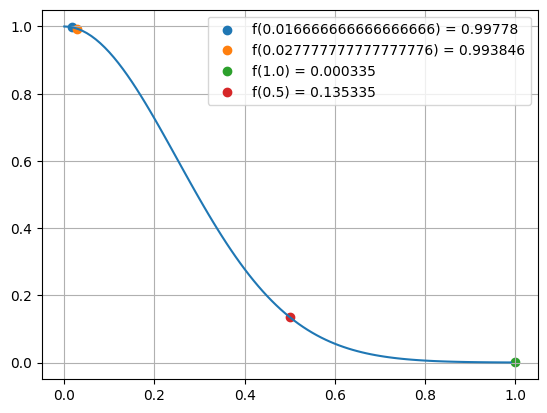

In [951]:
def func(x) -> float:
    beta_f = 1
    omega_f = 0.25
    #x = normalise(x)
    return (beta_f * np.exp(-1 * (x**(2)) / (2*(omega_f**2))))

#def func(x):
#    return x+1

def normalise(x):
    return x / 180

current = 0.743967
last = 0.743966
angle = 180
# point = last - current + 0.25
#point = angle

x = np.arange(0, 1, 0.01)
y = [func(elem) for elem in x]

plt.plot(x, y)
angle = normalise(3)
plt.scatter(angle, func(angle), label=f"f({angle}) = {np.round(func(angle), 6)}")

angle = normalise(5)
plt.scatter(angle, func(angle), label=f"f({angle}) = {np.round(func(angle), 6)}")

angle = normalise(180)
plt.scatter(angle, func(angle), label=f"f({angle}) = {np.round(func(angle), 6)}")

angle = normalise(90)
plt.scatter(angle, func(angle), label=f"f({angle}) = {np.round(func(angle), 6)}")

#plt.scatter(5, func(5), label=f"f({5}) = {np.round(func(5), 6)}")
#plt.scatter(3, func(3), label=f"f({3}) = {np.round(func(3), 6)}")
plt.grid()
plt.legend()

point

In [813]:
func(point)

0.011597587207372521

In [814]:
def f(x, y):
    return x / y

x = np.arange(0.9, 1.1, 0.01)
y = np.arange(0.9, 1.1, 0.01)


In [815]:
base = 1

In [816]:
def reward_pos(x):
    base = base + 1
    return x + 0.1 * base

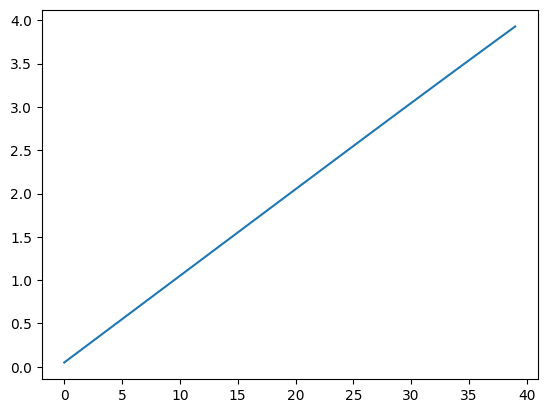

In [817]:
x_step = np.arange(0, 40, 1)
#y_reward = [((elem + 1) * (0.1 - 0.05)) for elem in x_step]
y_reward = []

for i in range(len(x_step)):
    s = x_step[i]
    if i == 0:
        r = 0.1
    else:
        r = (0.1) * (i + 1)
    r = r - (0.05 * reward_function_dist_traveled(i))
    y_reward.append(r)
    

plt.plot(x_step, y_reward)

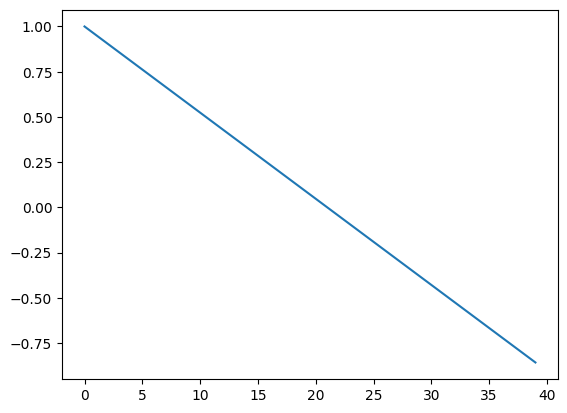

In [822]:
dist_traveled = 1

def dist_traveled_penalty(x):
    return 1 - x / (min_dist + 1)

x_step = np.arange(0, 40, 1)
y_penalty = [dist_traveled_penalty(elem) for elem in x_step]

plt.plot(x_step, y_penalty)

In [849]:
now = 0.6354480
last = 0.6354486

(last / now) * 0.1

0.10000009442157345

In [884]:
angle = 180
reward = 1
((1 - angle / 180) * reward )

0.0

In [ ]:
def func(x) -> float:
    beta_f = 1
    omega_f = 0.3
    x = x
    return (beta_f * np.exp(-1 * (x**2) / (2*(omega_f**2))))